In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
base='/content/drive/MyDrive/datasets/license_plate_dataset/'
print(base)


/content/drive/MyDrive/datasets/license_plate_dataset/


In [2]:
!pip install -U ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.2 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

# Load a pretrained small model (you can choose yolov8n.pt, yolov8s.pt, etc.)
model = YOLO("yolov8n.pt")

# Train
model.train(
    data="/content/drive/MyDrive/Licence_Plate_detection.v2i.yolov8/data.yaml",  # path to your data.yaml
    epochs=30,      # you can increase if you want better accuracy (e.g., 50)
    imgsz=640,      # image size
    batch=8,        # depends on GPU memory
    project="runs/train",
    name="lp_model"
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Licence_Plate_detection.v2i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, i

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c12f5f2dd00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [1]:
!ls runs/train/lp_model/weights/

best.pt  last.pt


In [2]:
from ultralytics import YOLO

# Load your trained YOLOv8 model
model = YOLO("/content/runs/train/lp_model/weights/best.pt")



In [3]:
# Path of any image from your test folder
image_path = "/content/drive/MyDrive/Licence_Plate_detection.v2i.yolov8/test/images/Cars35_png.rf.56b4e4b9eed8c6700432d8a831f08bd4.jpg"

# Run prediction
results = model.predict(source=image_path, show=True, save=True)

# The annotated image will be saved automatically in:
# /content/runs/detect/predict/




WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/drive/MyDrive/Licence_Plate_detection.v2i.yolov8/test/images/Cars35_png.rf.56b4e4b9eed8c6700432d8a831f08bd4.jpg: 640x640 1 licence, 7.4ms
Speed: 2.7ms preprocess, 7.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


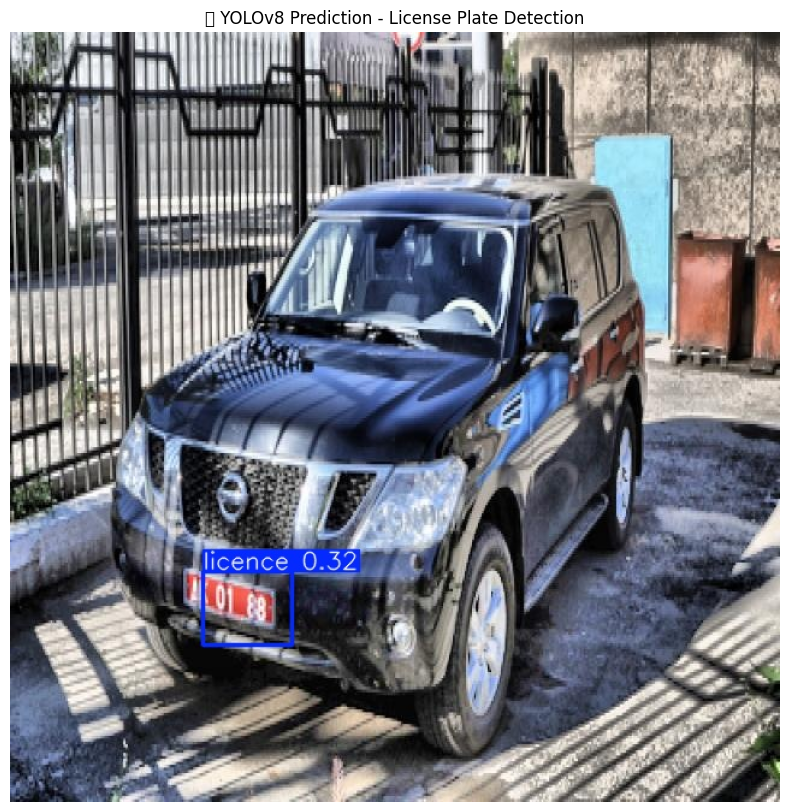

In [4]:
import matplotlib.pyplot as plt
import cv2

# Path where YOLO saved your predicted image
pred_path = "/content/runs/detect/predict2/Cars35_png.rf.56b4e4b9eed8c6700432d8a831f08bd4.jpg"

# Read and display image
img = cv2.imread(pred_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis("off")
plt.title("🔍 YOLOv8 Prediction - License Plate Detection")
plt.show()


In [5]:
from ultralytics import YOLO
import cv2, glob, matplotlib.pyplot as plt

model = YOLO("/content/runs/train/lp_model/weights/best.pt")
test_images = glob.glob("/content/drive/MyDrive/Licence_Plate_detection.v2i.yolov8/test/images/*.jpg")

for img_path in test_images[:5]:  # change number to show more
    results = model.predict(source=img_path, save=True)
    out_folder = results[0].save_dir
    img_name = img_path.split("/")[-1]
    pred_path = f"{out_folder}/{img_name}"

    img = cv2.imread(pred_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {img_name}")
    plt.show()


Output hidden; open in https://colab.research.google.com to view.


image 1/1 /content/drive/MyDrive/Licence_Plate_detection.v2i.yolov8/test/images/Cars35_png.rf.56b4e4b9eed8c6700432d8a831f08bd4.jpg: 640x640 1 licence, 7.3ms
Speed: 2.6ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict4


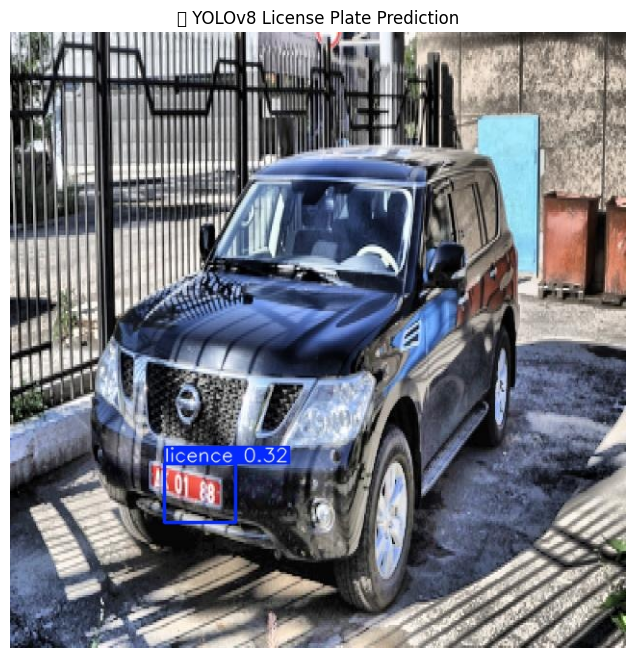

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# 1️⃣ Load your trained model
model = YOLO("/content/runs/train/lp_model/weights/best.pt")

# 2️⃣ Run prediction on one test image
image_path = "/content/drive/MyDrive/Licence_Plate_detection.v2i.yolov8/test/images/Cars35_png.rf.56b4e4b9eed8c6700432d8a831f08bd4.jpg"
results = model.predict(source=image_path, save=True)

# 3️⃣ Get path of saved prediction
pred_path = results[0].save_dir + "/" + image_path.split("/")[-1]

# 4️⃣ Display predicted image
img = cv2.imread(pred_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis("off")
plt.title("🔍 YOLOv8 License Plate Prediction")
plt.show()


In [6]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 28.8 MB/s eta 0:00:00


In [7]:
from ultralytics import YOLO
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow


In [8]:
uploaded = files.upload()    # opens a file-picker; choose your image
image_path = list(uploaded.keys())[0]
print("📁 Image uploaded:", image_path)


Saving predict2.jpg to predict2.jpg
📁 Image uploaded: predict2.jpg



0: 480x640 5 licences, 42.5ms
Speed: 3.1ms preprocess, 42.5ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)


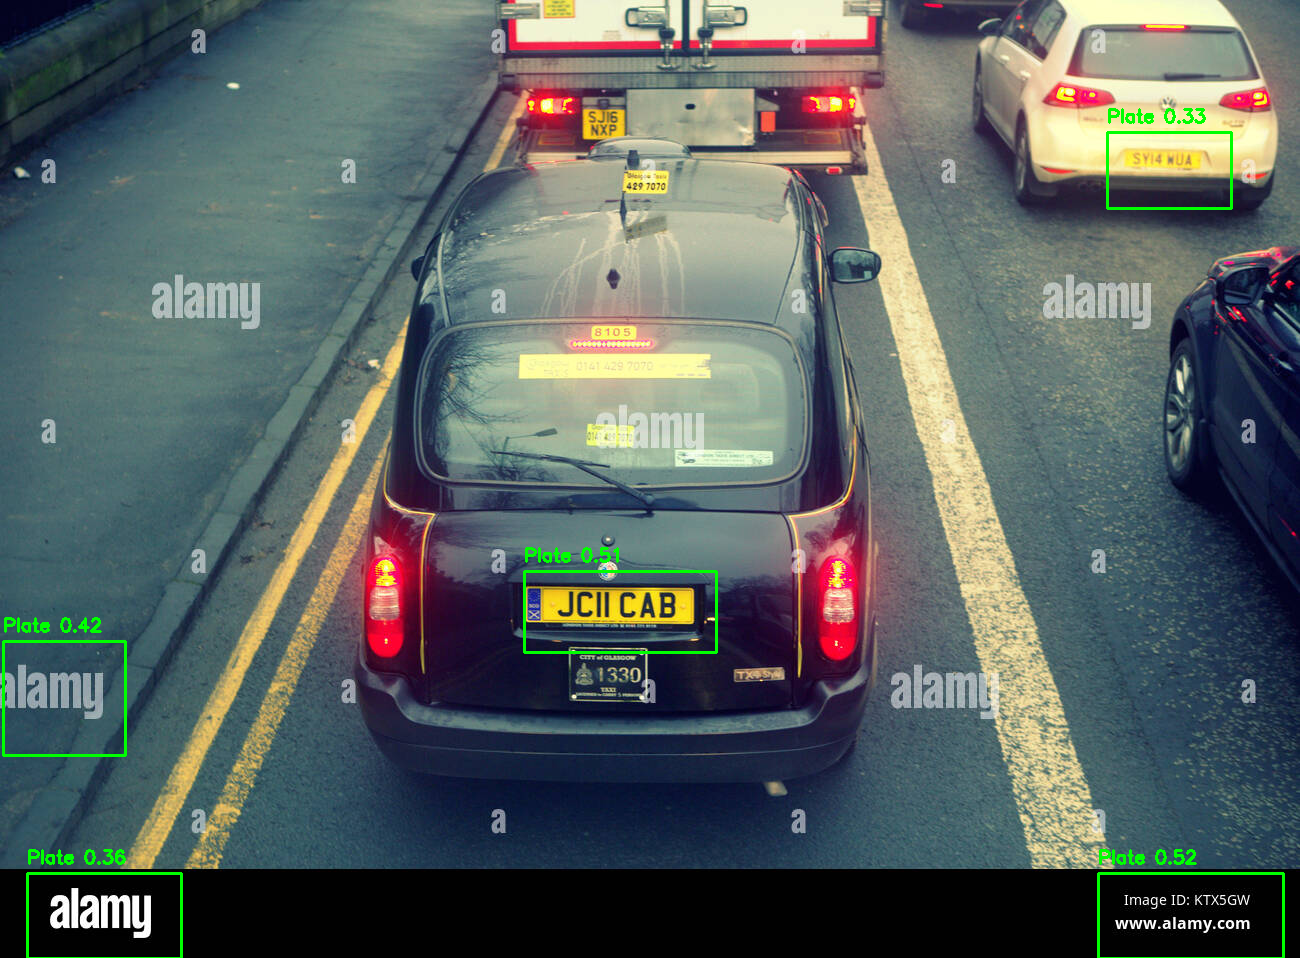

In [9]:
# Read the image
img = cv2.imread(image_path)

# Run YOLO detection
results = model.predict(source=img, conf=0.25)

# Draw boxes
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf)
    label = f"Plate {conf:.2f}"
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
    cv2.putText(img, label, (x1, y1-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

# Show the result
cv2_imshow(img)


In [ ]:
cv2.imwrite("predicted_result.jpg", img)
print("✅ Prediction image saved as predicted_result.jpg")


✅ Prediction image saved as predicted_result.jpg


In [10]:
from google.colab import files

uploaded = files.upload()    # Opens the file picker again
image_path = list(uploaded.keys())[0]
print("📁 Image uploaded:", image_path)


Saving predict3.jpg to predict3.jpg
📁 Image uploaded: predict3.jpg



0: 384x640 2 licences, 38.0ms
Speed: 2.8ms preprocess, 38.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


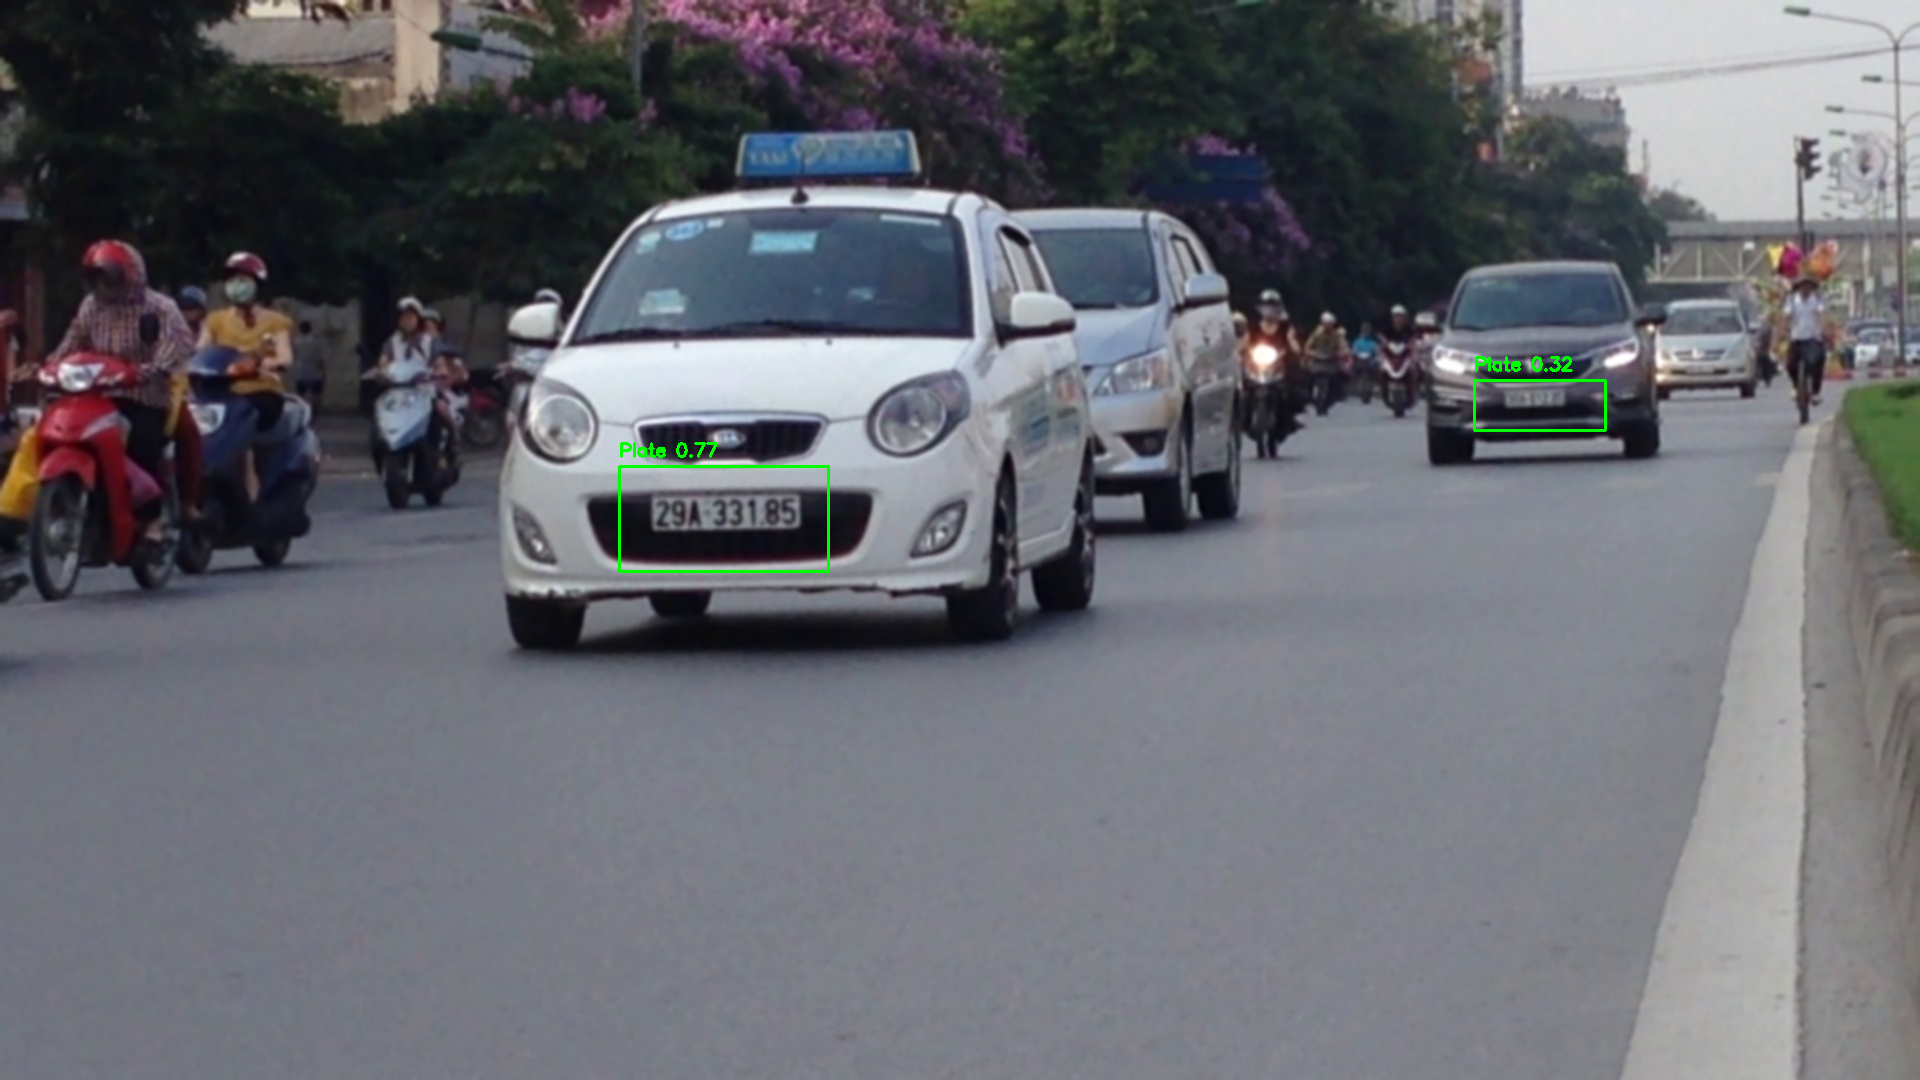

In [11]:
# Read the image
img = cv2.imread(image_path)

# Run YOLO detection
results = model.predict(source=img, conf=0.25)

# Draw boxes
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf)
    label = f"Plate {conf:.2f}"
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
    cv2.putText(img, label, (x1, y1-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

# Show the result
cv2_imshow(img)

In [ ]:
uploaded = files.upload()  # Select multiple files
for img_name in uploaded.keys():
    print("✅ Uploaded:", img_name)


Saving predict3.jpg to predict3 (1).jpg
✅ Uploaded: predict3 (1).jpg


In [12]:
uploaded = files.upload()  # upload your traffic or vehicle video
video_path = list(uploaded.keys())[0]
print("📹 Video uploaded:", video_path)

Saving traffic_video_original.mp4 to traffic_video_original.mp4
📹 Video uploaded: traffic_video_original.mp4


In [13]:
import cv2

# Open input video
cap = cv2.VideoCapture(f"/content/{video_path}")

# Define video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output_detected.mp4', fourcc, 30,
                      (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO detection
    results = model(frame, conf=0.25)

    # Draw detections
    annotated_frame = results[0].plot()
    out.write(annotated_frame)

cap.release()
out.release()
print("✅ Detection video saved as: output_detected.mp4")



0: 352x640 5 licences, 103.3ms
Speed: 10.3ms preprocess, 103.3ms inference, 4.6ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 6 licences, 15.1ms
Speed: 5.4ms preprocess, 15.1ms inference, 5.0ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 6 licences, 20.3ms
Speed: 6.8ms preprocess, 20.3ms inference, 10.6ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 4 licences, 15.6ms
Speed: 4.2ms preprocess, 15.6ms inference, 3.5ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 5 licences, 25.5ms
Speed: 3.6ms preprocess, 25.5ms inference, 12.9ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 5 licences, 19.9ms
Speed: 4.7ms preprocess, 19.9ms inference, 8.6ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 7 licences, 18.9ms
Speed: 2.9ms preprocess, 18.9ms inference, 9.7ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 5 licences, 19.2ms
Speed: 4.4ms preprocess, 19.2ms inference, 4.3ms postprocess per ima

In [14]:
!apt install tesseract-ocr
!pip install pytesseract
import pytesseract
import numpy as np

# Example: OCR on one detected plate region
results = model.predict(source=f"/content/{video_path}", conf=0.25, save=True)
for r in results:
    for box in r.boxes.xyxy:  # bounding boxes
        x1, y1, x2, y2 = map(int, box)
        plate_region = r.orig_img[y1:y2, x1:x2]
        text = pytesseract.image_to_string(plate_region)
        print("🔤 Detected Plate Number:", text.strip())


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/715) /content/traffic_video_original.mp4: 352x640 5 licences, 6.0ms
video 1/1 (frame 2/715) /content/traffic_video_original.mp4: 352x640 6 licences, 8.4ms
video 1/1 (frame 3/715) /content/traffic_video_original.mp

In [15]:
from google.colab import files
files.download('output_detected.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>